## Setup

In [70]:
import pandas as pd
import config
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [71]:
from functions import load_train, load_val
X_t, y_t = load_train(boolean=True)
X_v, y_v = load_val(boolean=True)
print("training set healthy proportion:", float(y_t.sum() / len(y_t)))
print("validation set healthy propoportion:", float(y_v.sum() / len(y_v)))

training set healthy proportion: 0.6063952150908672
validation set healthy propoportion: 0.17378497790868924


In [62]:
# combine and resplit data
X = pd.concat([X_t, X_v])
y = pd.concat([y_t, y_v])
print("total dataset healthy propoportion:", float(y.sum() / len(y)))

total dataset healthy propoportion: 0.547950656585754


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.135, random_state=42)
display(X_train)
display(y_train)
display(X_val)
display(y_val)
print("training set healthy proportion:", float(y_train.sum() / len(y_train)))
print("validation set healthy propoportion:", float(y_val.sum() / len(y_val)))

Species,s__Abiotrophia_defectiva,s__Acidaminococcus_fermentans,s__Acidaminococcus_intestini,s__Actinomyces_graevenitzii,s__Actinomyces_odontolyticus,s__Actinomyces_oris,s__Actinomyces_turicensis,s__Actinomyces_viscosus,s__Adlercreutzia_equolifaciens,s__Aggregatibacter_segnis,...,s__Subdoligranulum_variabile,s__Succinatimonas_hippei,s__Sutterella_wadsworthensis,s__Turicibacter_sanguinis,s__Varibaculum_cambriense,s__Veillonella_atypica,s__Veillonella_dispar,s__Veillonella_parvula,s__Weissella_cibaria,s__Weissella_confusa
SAMN07424389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
SAMEA2466926,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,1,1,0,0,0
SAMEA3182062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR5279290,0,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,1,0,0
SAMEA3646731,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMD00114964,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA1972159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN00070035,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
SAMN06110010,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


,isHealthy
SAMN07424389,True
SAMEA2466926,False
SAMEA3182062,True
SRR5279290,False
SAMEA3646731,True
...,...
SAMD00114964,False
SAMEA1972159,False
SAMN00070035,True
SAMN06110010,True


Species,s__Abiotrophia_defectiva,s__Acidaminococcus_fermentans,s__Acidaminococcus_intestini,s__Actinomyces_graevenitzii,s__Actinomyces_odontolyticus,s__Actinomyces_oris,s__Actinomyces_turicensis,s__Actinomyces_viscosus,s__Adlercreutzia_equolifaciens,s__Aggregatibacter_segnis,...,s__Subdoligranulum_variabile,s__Succinatimonas_hippei,s__Sutterella_wadsworthensis,s__Turicibacter_sanguinis,s__Varibaculum_cambriense,s__Veillonella_atypica,s__Veillonella_dispar,s__Veillonella_parvula,s__Weissella_cibaria,s__Weissella_confusa
SAMEA2466963,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
SRR5275443,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
SAMEA3665278,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
SAMEA3665080,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
SAMEA2466896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA2467001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
SAMEA2151010,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
SAMEA3664717,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
SAMN00715273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


,isHealthy
SAMEA2466963,False
SRR5275443,False
SAMEA3665278,True
SAMEA3665080,True
SAMEA2466896,False
...,...
SAMEA2467001,False
SAMEA2151010,False
SAMEA3664717,True
SAMN00715273,False


training set healthy proportion: 0.5452035886818496
validation set healthy propoportion: 0.5655375552282769


<AxesSubplot:ylabel='Frequency'>

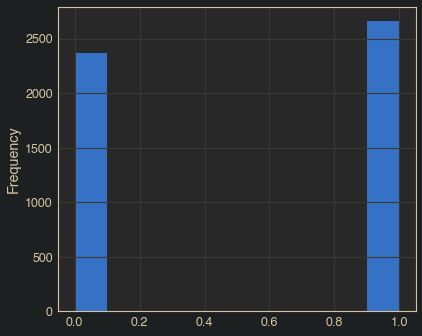

In [69]:
i = 10
column = X.iloc[:, i]
column.plot.hist()

## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import numpy as np

strat_kfold = StratifiedKFold(10, shuffle=True, random_state=42)

for C in [0.1, 0.3, 1, 3]:
    print("C parameter:", C)
    logreg = LogisticRegression(C=C, penalty='l1',
    fit_intercept=True, max_iter=700, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1, verbose=10)
    scores = cross_val_score(logreg, X_train, np.ravel(y_train), cv = strat_kfold, 
                             scoring = "accuracy", n_jobs=-1, verbose=0)
    print("Raw scores:", scores)
    print("Mean score:", np.mean(scores))
    print("Std:", np.std(scores))
    print()

C parameter: 0.1
Raw scores: [0.75402299 0.76091954 0.73793103 0.77011494 0.75172414 0.73793103
 0.76551724 0.76958525 0.75576037 0.72580645]
Mean score: 0.7529312993272949
Std: 0.014111256582626736

C parameter: 0.3
Raw scores: [0.74022989 0.77011494 0.74712644 0.79310345 0.75862069 0.73333333
 0.76091954 0.78341014 0.75806452 0.70737327]
Mean score: 0.755229620212935
Std: 0.02358470592652648

C parameter: 1
Raw scores: [0.75172414 0.75862069 0.75172414 0.77471264 0.75402299 0.74252874
 0.75632184 0.76267281 0.75576037 0.71658986]
Mean score: 0.7524678213888447
Std: 0.014325027501093287

C parameter: 3
Raw scores: [0.75402299 0.74712644 0.75172414 0.77011494 0.74712644 0.74712644
 0.75632184 0.76267281 0.76267281 0.7235023 ]
Mean score: 0.7522411144658085
Std: 0.01208969797989819



In [352]:
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv, data_points=5):
    t_sizes = np.linspace(0.1, 1.0, data_points)
    train_sizes, train_scores, valid_scores = learning_curve(logreg,
        X, y.values.ravel(), cv=cv, scoring="accuracy", n_jobs=-1, verbose=10, train_sizes=t_sizes,
        shuffle=True, random_state=42)
    training_loss = train_scores.flatten()
    valid_loss = valid_scores.flatten()
    losses = np.concatenate([training_loss, valid_loss])
    learning = pd.DataFrame(losses, columns=['accuracy'])
    n_splits = cv.get_n_splits()
    learning['set'] = ['training'] * (data_points * n_splits) + ['validation'] * (data_points * n_splits)
    learning['training set size'] = [s for s in train_sizes for i in range(n_splits)] * 2
    plt.figure(figsize=(20,10))
    plt.title("Training Set and Validation Set Accuracy vs Training Set Size")
    sns.lineplot(data=learning, x='training set size', y='accuracy', hue="set")

In [405]:
logreg = LogisticRegression(C=1, penalty='l1',
    fit_intercept=True, max_iter=1000, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1)

[learning_curve] Training set sizes: [ 452  904 1356 1809 2261 2713 3166 3618 4070 4523]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    3.1s remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    5.3s remaining:   35.2s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    8.7s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   12.1s remaining:   22.4s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   17.2s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   22.0s remaining:   16.6s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   24.8s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   29.4s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   32.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.5s finished


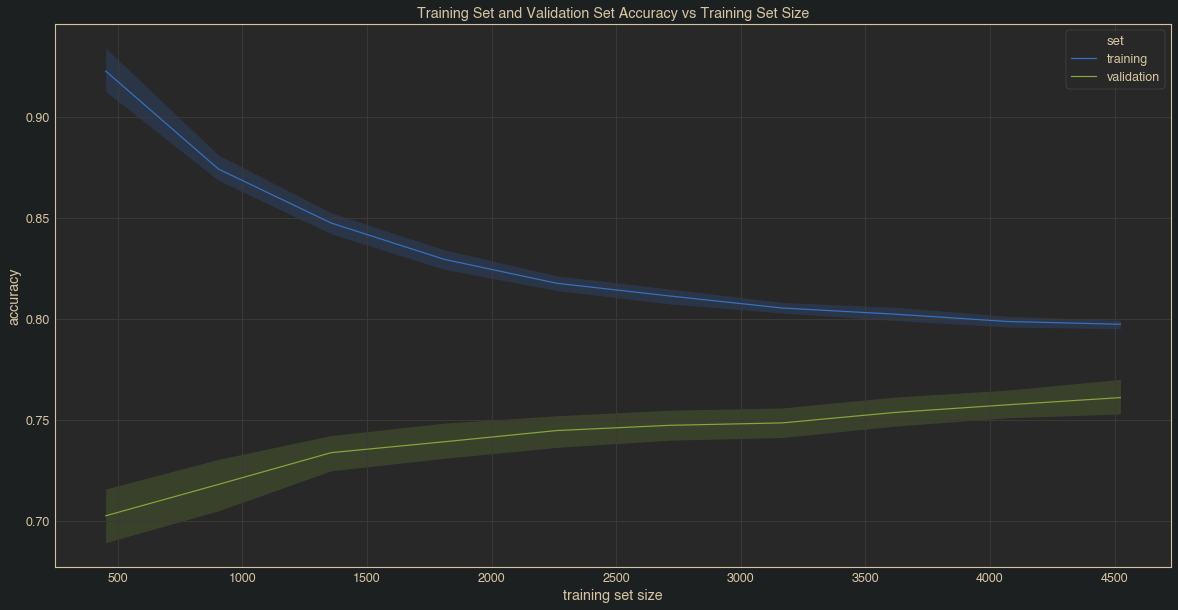

In [406]:
strat_kfold = StratifiedKFold(10, shuffle=True, random_state=42)
plot_learning_curve(logreg, X, y, strat_kfold, data_points=10)

In [398]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=0.3, penalty='l1',
    fit_intercept=True, max_iter=1000, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1)
logreg.fit(X_train, y_train.values.ravel())

y_hat_val = logreg.predict(X_val)
acc = accuracy_score(y_hat_val, y_val)
acc

0.7643593519882179